In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv('customer_churn_dataset.csv')
print(df.head())


   monthly_charges  tenure_months  total_charges  service_calls  \
0            82.40              2         135.02              4   
1            72.86             26        1954.98              0   
2            79.62              2          96.87              0   
3            50.30             33        1629.99              1   
4            42.15             26        1112.07              5   

   contract_type  churn  
0              0      1  
1              2      0  
2              0      1  
3              0      0  
4              1      0  


In [4]:
df.shape

(500, 6)

In [5]:
df.describe()


,monthly_charges,tenure_months,total_charges,service_calls,contract_type,churn
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,69.979420,22.192000,1342.556880,2.294000,0.752000,0.500000
std,20.824358,17.986388,1057.057573,1.864005,0.814754,0.500501
min,20.000000,1.000000,63.390000,0.000000,0.000000,0.000000
25%,55.335000,5.000000,414.712500,1.000000,0.000000,0.000000
50%,69.850000,19.000000,1116.320000,2.000000,1.000000,0.500000
75%,85.112500,37.000000,2019.550000,3.000000,1.000000,1.000000
max,120.000000,72.000000,4956.600000,10.000000,2.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  500 non-null    float64
 1   tenure_months    500 non-null    int64  
 2   total_charges    500 non-null    float64
 3   service_calls    500 non-null    int64  
 4   contract_type    500 non-null    int64  
 5   churn            500 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 23.6 KB


In [7]:
df['churn'].value_counts()

churn
1    250
0    250
Name: count, dtype: int64

In [8]:
X = df.drop('churn', axis=1)
y = df['churn']
print(X.shape)
print(y.shape)

(500, 5)
(500,)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 5)
(400,)
(100, 5)
(100,)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11, weights='distance')
knn.fit(X_train_scaled,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",11
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [12]:
y_pred= knn.predict(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.97

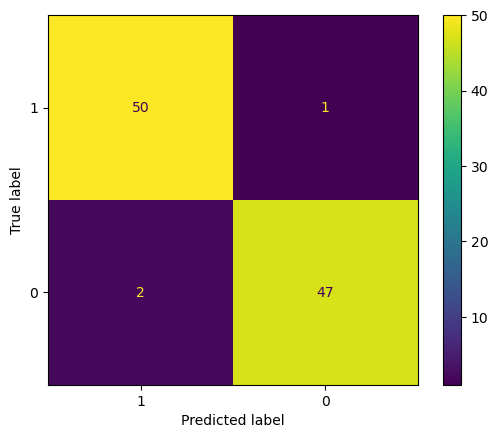

In [17]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['churn'].unique())
cm_plot.plot()
plt.savefig("cm.png")
plt.show()

In [18]:
X_test

,monthly_charges,tenure_months,total_charges,service_calls,contract_type
361,99.68,7,728.60,7,1
73,75.54,27,2012.94,2,1
374,76.72,30,2320.48,3,0
155,66.44,10,693.72,3,0
104,55.38,41,2297.40,2,2
...,...,...,...,...,...
347,49.28,39,1947.65,0,2
86,57.19,26,1478.32,1,1
75,69.93,58,4093.58,3,1
438,94.63,1,129.37,3,1


In [19]:
X_test_scaled

array([[ 1.36889099e+00, -8.34941836e-01, -5.73720766e-01,
         2.52309220e+00,  3.13490792e-01],
       [ 2.32549819e-01,  2.81104060e-01,  6.35232725e-01,
        -1.61048438e-01,  3.13490792e-01],
       [ 2.88095908e-01,  4.48510944e-01,  9.24721145e-01,
         3.75779689e-01, -9.28056899e-01],
       [-1.95814084e-01, -6.67534951e-01, -6.06553426e-01,
         3.75779689e-01, -9.28056899e-01],
       [-7.16440983e-01,  1.06233619e+00,  9.02995864e-01,
        -1.61048438e-01,  1.55503848e+00],
       [-5.19676025e-01,  1.06233619e+00,  1.05139233e+00,
        -1.23470469e+00,  3.13490792e-01],
       [-5.98287862e-01,  2.34578897e+00,  2.25745602e+00,
        -1.23470469e+00,  3.13490792e-01],
       [-9.95112885e-01,  2.45739356e+00,  1.83728646e+00,
        -1.61048438e-01,  1.55503848e+00],
       [-3.30913469e-01, -6.11732656e-01, -5.93638744e-01,
        -1.61048438e-01, -9.28056899e-01],
       [-3.85518099e-01, -1.00234872e+00, -9.59438623e-01,
        -1.61048438e-01

In [20]:
y_test

361    1
73     0
374    1
155    1
104    0
      ..
347    0
86     0
75     0
438    1
15     0
Name: churn, Length: 100, dtype: int64

In [21]:
ans = knn.predict([[1.36889099e+00, -8.34941836e-01, -5.73720766e-01,
         2.52309220e+00,  3.13490792e-01]])
print(ans[0])

1


In [22]:
import joblib
joblib.dump(knn, 'knn_model.joblib')
print('SUCCESS')

SUCCESS


In [24]:
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved as 'scaler.joblib'")

Scaler saved as 'scaler.joblib'


In [26]:
df['monthly_charges'].max()

120.0